<a href="https://colab.research.google.com/github/ddesai-sjsu/Machine-Learning/blob/main/Copy_of_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Installing gdown to download data from google drive

In [7]:
!pip install gdown

In [8]:
  import gdown

  url = 'https://drive.google.com/uc?id=1Z0qP3bGH7sM4ExVoHJbHEeRl3tDiMohN'
  output = 'yelp.json'
  gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Z0qP3bGH7sM4ExVoHJbHEeRl3tDiMohN
To: /content/yelp.json
124MB [00:00, 164MB/s]


'yelp.json'

In [10]:
import sqlite3
import pandas as pd
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [11]:
df=pd.read_json('/content/yelp.json',lines=True)
df['attributes'] = df['attributes'].apply(lambda x: {} if pd.isna(x) else x)
df2=json_normalize(df['attributes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


2. Normalizing columns and data cleaning

In [12]:
df3 = pd.merge(df,df2,left_index=True,right_index=True)
df3

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,RestaurantsTableService,WiFi,BikeParking,BusinessParking,BusinessAcceptsCreditCards,RestaurantsReservations,WheelchairAccessible,Caters,OutdoorSeating,RestaurantsGoodForGroups,HappyHour,BusinessAcceptsBitcoin,RestaurantsPriceRange2,Ambience,HasTV,Alcohol,GoodForMeal,DogsAllowed,RestaurantsTakeOut,NoiseLevel,RestaurantsAttire,RestaurantsDelivery,GoodForKids,ByAppointmentOnly,AcceptsInsurance,HairSpecializesIn,GoodForDancing,BestNights,Music,BYOB,CoatCheck,Smoking,DriveThru,BYOBCorkage,Corkage,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Open24Hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",True,u'free',True,"{'garage': False, 'street': True, 'validated':...",True,False,True,True,True,True,True,False,2,"{'touristy': False, 'hipster': False, 'romanti...",True,'beer_and_wine',"{'dessert': False, 'latenight': False, 'lunch'...",False,True,u'average','casual',None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,u'free',False,"{'garage': True, 'street': False, 'validated':...",True,False,NaN,True,False,False,NaN,NaN,2,"{'romantic': False, 'intimate': False, 'touris...",False,u'beer_and_wine',"{'dessert': False, 'latenight': False, 'lunch'...",NaN,True,u'average',u'casual',False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...",NaN,NaN,False,"{'garage': False, 'street': True, 'validated':...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...",NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,{},"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Mond

In [13]:
df3=df3.drop('attributes',1)
df3=df3.drop('categories',1)
df3=df3.drop('hours',1)
df3=df3.drop('BusinessParking',1)
df3=df3.drop('Ambience',1)
df3=df3.drop('GoodForMeal',1)

In [14]:
df3.fillna(False,inplace=True)

In [15]:
df3['WiFi'].replace("u'no'", False, inplace=True)
df3['Alcohol'].replace(["u'beer_and_wine'","'beer_and_wine'"], True, inplace=True)
df3['NoiseLevel'].replace(["u'average'","'average'"	], True, inplace=True)



In [16]:
df3.replace('False', 0, inplace=True)
df3.replace('True', 1, inplace=True)
df3.replace(False, 0, inplace=True)
df3.replace(True, 1, inplace=True)
df3

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTableService,WiFi,BikeParking,BusinessAcceptsCreditCards,RestaurantsReservations,WheelchairAccessible,Caters,OutdoorSeating,RestaurantsGoodForGroups,HappyHour,BusinessAcceptsBitcoin,RestaurantsPriceRange2,HasTV,Alcohol,DogsAllowed,RestaurantsTakeOut,NoiseLevel,RestaurantsAttire,RestaurantsDelivery,GoodForKids,ByAppointmentOnly,AcceptsInsurance,HairSpecializesIn,GoodForDancing,BestNights,Music,BYOB,CoatCheck,Smoking,DriveThru,BYOBCorkage,Corkage,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Open24Hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,1,u'free',1,1,0,1,1,1,1,1,0,2,1,1,0,1,1,'casual',None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,0,u'free',0,1,0,0,1,0,0,0,0,2,0,1,0,1,1,u'casual',0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3.dtypes

In [16]:
cols = df3.columns # Saving column names to a variable
cols

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'RestaurantsTableService', 'WiFi', 'BikeParking',
       'BusinessAcceptsCreditCards', 'RestaurantsReservations',
       'WheelchairAccessible', 'Caters', 'OutdoorSeating',
       'RestaurantsGoodForGroups', 'HappyHour', 'BusinessAcceptsBitcoin',
       'RestaurantsPriceRange2', 'HasTV', 'Alcohol', 'DogsAllowed',
       'RestaurantsTakeOut', 'NoiseLevel', 'RestaurantsAttire',
       'RestaurantsDelivery', 'GoodForKids', 'ByAppointmentOnly',
       'AcceptsInsurance', 'HairSpecializesIn', 'GoodForDancing', 'BestNights',
       'Music', 'BYOB', 'CoatCheck', 'Smoking', 'DriveThru', 'BYOBCorkage',
       'Corkage', 'RestaurantsCounterService', 'AgesAllowed',
       'DietaryRestrictions', 'Open24Hours'],
      dtype='object')

In [17]:
cols=[
       'postal_code','review_count','stars','RestaurantsReservations',
       'WheelchairAccessible', 'Caters', 'OutdoorSeating',
       'RestaurantsGoodForGroups', 'HappyHour', 'BusinessAcceptsBitcoin',
       'RestaurantsPriceRange2', 'HasTV', 'Alcohol', 'DogsAllowed',
       'RestaurantsTakeOut', 'NoiseLevel', 'RestaurantsDelivery',
       'GoodForKids']

In [18]:
df4=df3[cols].apply(pd.to_numeric, errors='coerce') 

In [ ]:
df4

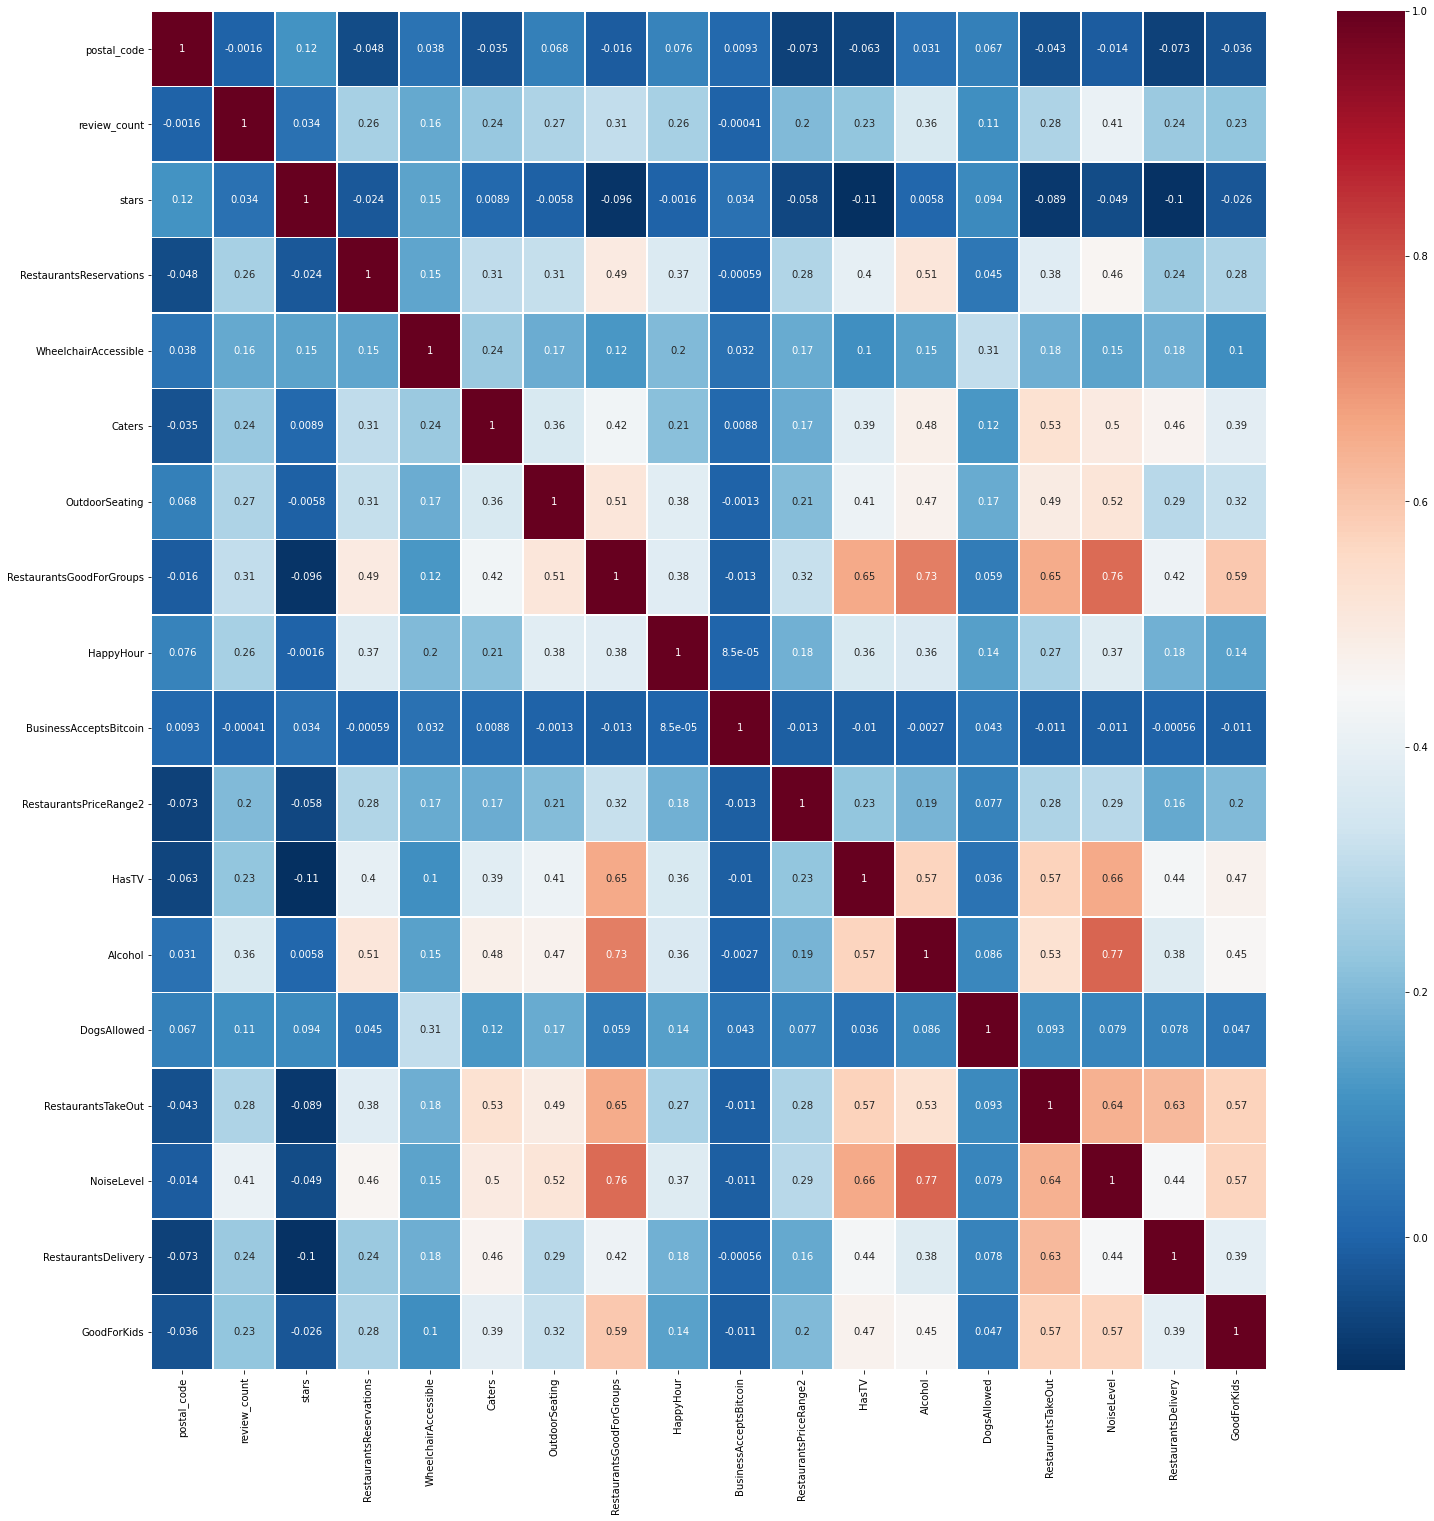

In [19]:

import seaborn as sb

pearsoncorr=df4.corr()
plt.figure(1,figsize=(25,25))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [19]:
df4=df4.dropna()
df5=df4[['RestaurantsPriceRange2','stars']]

In [21]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df5)
    Sum_of_squared_distances.append(km.inertia_)

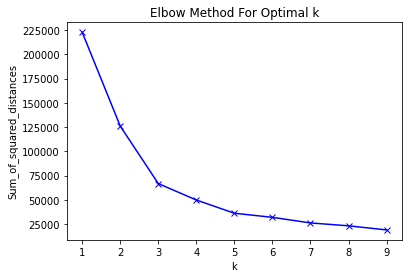

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette',timings=False)

visualizer.fit(df5)    
visualizer.poof() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(df5)


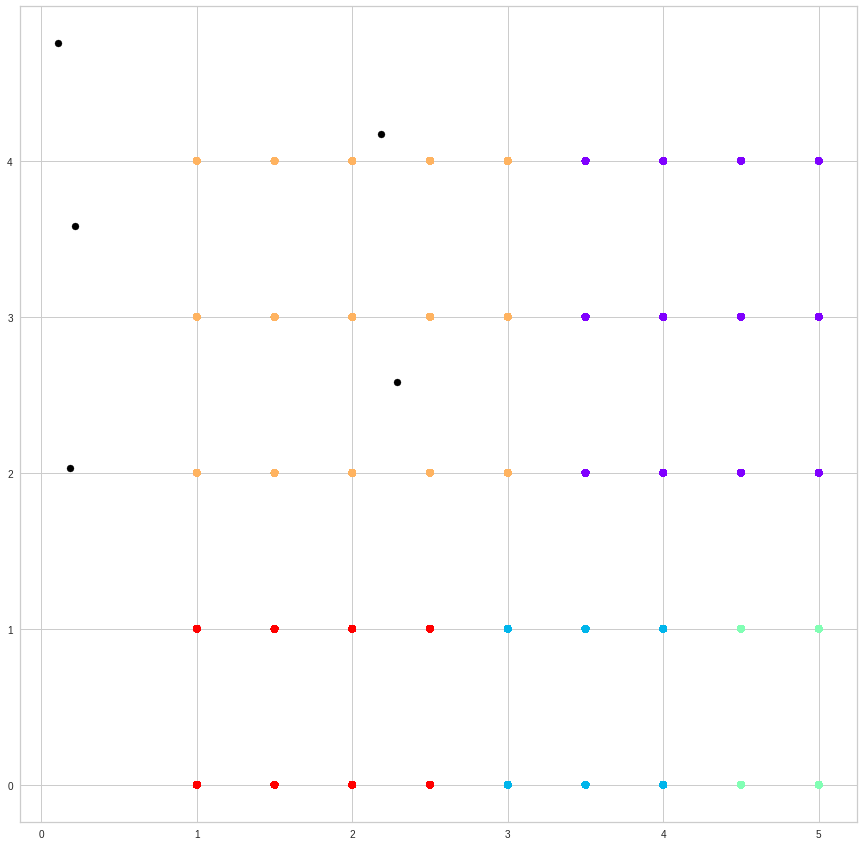

In [25]:
plt.figure(1,figsize=(15,15))
plt.scatter(df5.stars, df5.RestaurantsPriceRange2, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [70]:
import numpy as np
import tensorflow as tf

num_points = 100
dimensions = 2
# points = np.random.uniform(0, 1000, [num_points, dimensions])
points=df5
def input_fn():
    return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 4
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]
    print('point:', point, 'is in cluster', cluster_indices, 'centered at', center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmphlq_av05', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

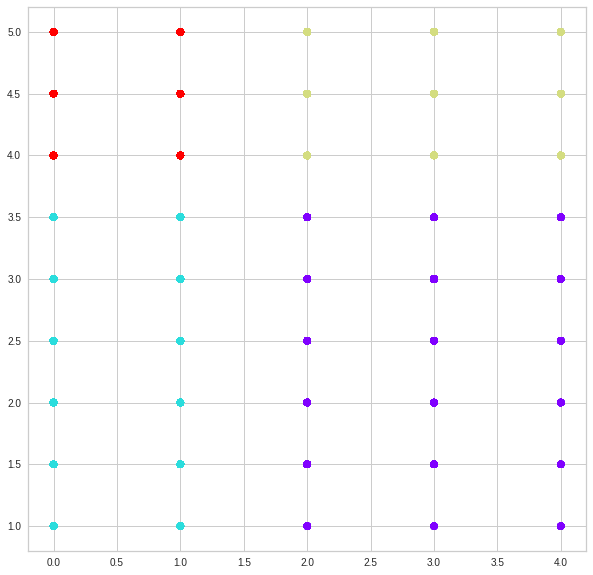

In [74]:
X=df5
k_means_predicted = kmeans.predict(X)
centroids = kmeans.cluster_centers
plt.figure('K-Means on Iris Dataset', figsize=(10,10),)
plt.scatter(X.RestaurantsPriceRange2 ,X.stars, c=cluster_indices, cmap='rainbow' )

In [72]:
new_df=df4.groupby(by=['postal_code','RestaurantsPriceRange2'],axis=0)['stars'].mean().reset_index()

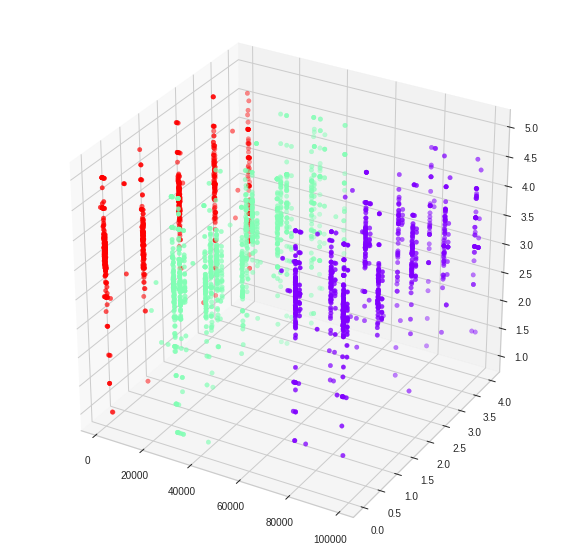

In [73]:
X=new_df
k_means = KMeans(n_clusters=3)
k_means.fit(X)
k_means_predicted = k_means.predict(X)
centroids = k_means.cluster_centers_
colors = ['navy', 'turquoise', 'darkorange']
plt.figure('K-Means on Iris Dataset', figsize=(10,10),)
ax = plt.axes(projection = '3d')
ax.scatter(X.postal_code,X.RestaurantsPriceRange2,X.stars, c=k_means.labels_, cmap='rainbow' )